This first exercise is to simply get the top tracks from the specified band (in this case, the legendary jam band Phish).  We need to search Phish's unique Spotify ID first.  Once we have the ID, we can use the artist_top_tracks function to get a list of their top tracks.  We append this data into an array and then create a dataframe.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

cid = ''
secret = ''
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

name = 'Phish'

results = sp.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    #print(artist['name'], artist['id'])

tt_album = []
tt_track_name = []
tt_track_popularity = []
tt_id = []
    
tt_results = sp.artist_top_tracks(artist['id'])
tt_tracks = tt_results['tracks']
for track in tt_tracks:
    tt_album.append(track['album']['name'])
    tt_track_name.append(track['name'])
    tt_track_popularity.append(track['popularity'])
    tt_id.append(track['id'])

track_df = pd.DataFrame({
    'track_album':tt_album,
    'track_name':tt_track_name,
    'track_popularity':tt_track_popularity,
    'track_id':tt_id
})

track_df

,track_album,track_name,track_popularity,track_id
0,Farmhouse,Farmhouse,54,5dVtj4IAnYSrI3jVfIFIaC
1,Hoist,Sample in a Jar,49,6MCUdqOifrEomDtrgZlJ8O
2,Lawn Boy,Bouncing Around the Room,49,4pYQb0fYwPbTD09uDhiQzU
3,Billy Breathes,Waste,48,6dKntZwVJx0QLX6IM19gC7
4,Farmhouse,Heavy Things,48,12gHzpb83V2Eh6D2sKUPlU
5,Billy Breathes,Free,46,6cAP4aefOH4dYOpdrldV2f
6,LivePhish 04/03/98,Roses Are Free,44,0njoGyz7YLEOqgwYP9QOwn
7,Farmhouse,Back on the Train,42,1NVlLhQzlB6c8MAsSKncft
8,Hoist,If I Could,42,2TuOkb5mdkO2IBTG7Ch4ns
9,Billy Breathes,Character Zero,42,0u7bpomleML1Vln9bRZVST


It is clear Phish's top tracks come from studio albums.  This is not surprising. Of course, Phish fans are more intersted in their live music.  We can see item 6 is from a live album, and we know Spotify has a decent collection of live Phish albums.  What if we try to find Phish's best jams on Spotify?  How is this even defined?  Let's try an exercise.

First, we need to get all of Phish's albums on Spotify, and then every song on each of those albums.  We can then build a dataframe of their songs available on Spotify.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials

cid = 'a4ae2aa503b84ac3bac9a656922cb619'
secret = '9861767715264f658e9483fe5d4a54fb'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

name = 'Phish'

results = sp.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    #print(artist['name'], artist['id'])

album_list = []
album_ids = []
tracks = []
track_album = []
track_ids = []
duration = []
popularity = []

for i in range(0,1000,50):
    a_results = sp.artist_albums(artist['id'],album_type='album',limit=50,offset=i)
    albums = a_results['items']
    for album in albums:
        album_list.append(album['name'])
        album_ids.append(album['id'])
        for i in range(0,1000,50):
            at_results = sp.album_tracks(album['id'],limit=50,offset=i)
            album_tracks = at_results['items']
            for track in album_tracks:
                tracks.append(track['name'])
                track_album.append(album['name'])
                track_ids.append(track['id'])
                duration.append(track['duration_ms'])
                t_results = sp.track(track['id'])
                popularity.append(t_results['popularity'])

album_df = pd.DataFrame({
    'album':album_list,
    'id':album_ids
})

track_df = pd.DataFrame({
    'album':track_album,
    'track':tracks,
    'id':track_ids,
    'duration':duration,
    'popularity':popularity
})

#album_df
track_df

,album,track,id,duration,popularity
0,Sigma Oasis,Sigma Oasis,4ujSfZBGe8OtTSj5SJ5D9a,349751,38
1,Sigma Oasis,Leaves,7dofwN9eHwDhxXoiHG0wlV,423240,28
2,Sigma Oasis,Everything's Right,5wquLeDwlxxjijDWPQNzIT,741611,36
3,Sigma Oasis,Mercury,7bLSHfahHTHyyi78ui6gSI,450919,33
4,Sigma Oasis,Shade,6e95qF9rFQ3uvznsTv5yYc,264520,33
...,...,...,...,...,...
2172,The White Tape,Dog Gone Dog,4osE8ZNP1hKsU45OmIlD9H,243466,12
2173,The White Tape,He Ent To The Bog,5nxA7neOhSKrsK5jMEBLZu,236306,9
2174,The White Tape,Run Like An Antelope,5eOnCzxHabKxg15MdnITnN,401266,12
2175,The White Tape,Minkin,7JytvPdGPC6wmfTrmGUdIu,179866,8


Ok, awesome.  We can see there are 2177 songs to choose from.  Let's change the duration from milliseconds to minutes, and create a scatter plot comparing duration and popularity.

<AxesSubplot:xlabel='duration', ylabel='popularity'>

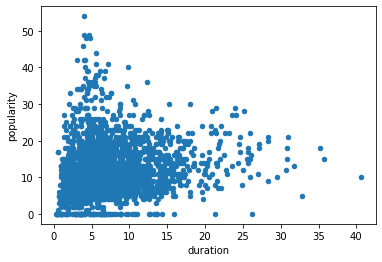

In [3]:
track_df['duration'] = track_df['duration'].div(60000)

track_df.plot.scatter('duration','popularity')

There are many ways to analyze this graph.  We can see only a handful of songs above popularity of 30, and they are mostly less than 10 minutes. For the sake of the exercise, let's define the best jams as duration * popularity.  This will skew more towards longer jams, but it's a good place to start.

In [7]:
track_df['DPO'] = (track_df['duration'] * track_df['popularity'])

track_df.sort_values(by=['DPO'],ascending=False)

,album,track,id,duration,popularity,DPO
11,The Baker's Dozen: Live At Madison Square Garden,Simple (Live) - 8/6/17 Glazed,16Cb3e1ss8YfFWNnsEPN8d,25.159767,28,704.473467
1004,"LivePhish, Vol. 17 7/15/98 (Portland Meadows, ...",Bathtub Gin (7/29/98),2YcWr5D9cVYcrGswsGL4VQ,23.962433,29,694.910567
16,The Baker's Dozen: Live At Madison Square Garden,Chalk Dust Torture (Live) - 7/28/17 Chocolate,2o5CwcwWsxLY6N6jB6RArZ,24.091767,27,650.477700
1346,A Live One,"Tweezer - Live - Clifford Ball, 1994",3vGZ0ypxjYUVHEWbF7n1Yg,30.926667,21,649.460000
9,The Baker's Dozen: Live At Madison Square Garden,Blaze On (Live) - 7/29/17 Cinnamon,4DxqBUalgVhS8FjnCsjNLg,23.588000,27,636.876000
...,...,...,...,...,...,...
1749,"8/7/93 Darien Lake Performing Arts Center, Dar...",Purple Rain - Live,1wZj376BW4S9Pt8gPigNdT,6.134667,0,0.000000
1754,At The Roxy (Atlanta ' 93),Loving Cup,0Qb0K8B0ssiDyXlbWfgnjQ,6.652667,0,0.000000
1755,At The Roxy (Atlanta ' 93),Rift,6edfNbAb6H5ciRUVh7MFqD,6.124217,0,0.000000
1756,At The Roxy (Atlanta ' 93),Split Open and Melt,2TVPwjH0DHQTUck3Hdz4sX,8.811767,0,0.000000


Alright, we have our new metric of Duration Popularity Output (DPO).  Let's see the best results!

In [11]:
track_df.nlargest(20,'DPO')

,album,track,id,duration,popularity,DPO
11,The Baker's Dozen: Live At Madison Square Garden,Simple (Live) - 8/6/17 Glazed,16Cb3e1ss8YfFWNnsEPN8d,25.159767,28,704.473467
1004,"LivePhish, Vol. 17 7/15/98 (Portland Meadows, ...",Bathtub Gin (7/29/98),2YcWr5D9cVYcrGswsGL4VQ,23.962433,29,694.910567
16,The Baker's Dozen: Live At Madison Square Garden,Chalk Dust Torture (Live) - 7/28/17 Chocolate,2o5CwcwWsxLY6N6jB6RArZ,24.091767,27,650.477700
1346,A Live One,"Tweezer - Live - Clifford Ball, 1994",3vGZ0ypxjYUVHEWbF7n1Yg,30.926667,21,649.460000
9,The Baker's Dozen: Live At Madison Square Garden,Blaze On (Live) - 7/29/17 Cinnamon,4DxqBUalgVhS8FjnCsjNLg,23.588000,27,636.876000
1044,Phish: Star Lake '98,Runaway Jim,3mMI4utz3S6y4T1hPx4xlj,35.139067,18,632.503200
1160,"LivePhish, Vol. 11 11/17/97 (McNichols Sports ...",Ghost,158HkkFddKcp5JyQRXdcyA,21.410433,29,620.902567
1170,"LivePhish, Vol. 11 11/17/97 (McNichols Sports ...",Wolfman's Brother (11/19/97),5E7V6Oro2SdzhuRzQodfco,28.352667,21,595.406000
1342,A Live One,You Enjoy Myself - Live Version - Clifford Bal...,1li6Y2MPA2fJ4a9jWK9RPg,20.955550,28,586.755400
380,Hampton/Winston-Salem '97,Halley's Comet,5xiv6HVE3pBksBOhRRFLIQ,26.002883,22,572.063433


What a great list!  Need a jam to listen to?  This is a great place to start.